# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 1: clean and EDA
df = pd.read_csv('pierce_county_house_sales.csv')
print(df.head())
print(df.info())
print(df.describe())

    sale_date  sale_price  house_square_feet  attic_finished_square_feet  \
0  2020-01-02      380000               2157                           0   
1  2020-01-02      383000               2238                           0   
2  2020-01-01      419900               1452                           0   
3  2020-01-02      251660                832                           0   
4  2020-01-02      500000               1780                           0   

   basement_square_feet  attached_garage_square_feet  \
0                     0                          528   
1                     0                          396   
2                     0                            0   
3                     0                            0   
4                   384                          484   

   detached_garage_square_feet  fireplaces        hvac_description  \
0                            0           0  Warm and Cool Air Zone   
1                            0           0              Forced Air

sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64


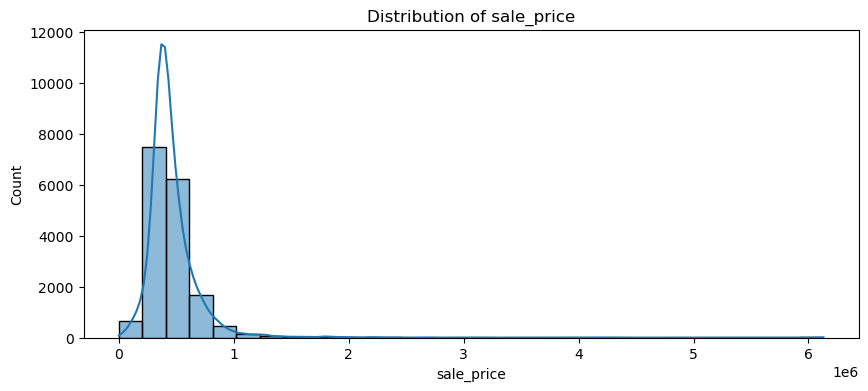

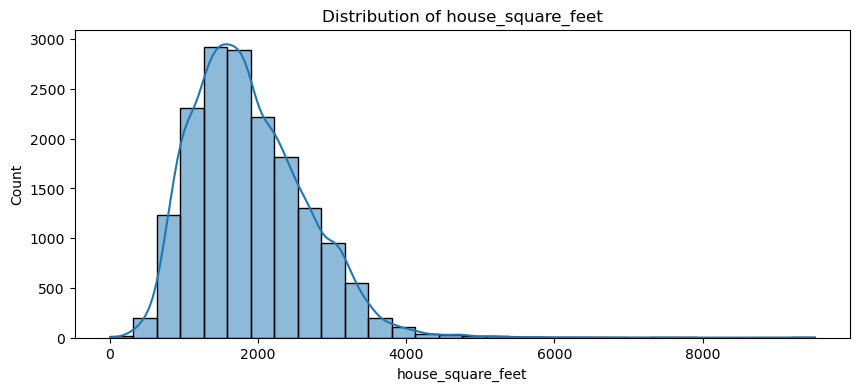

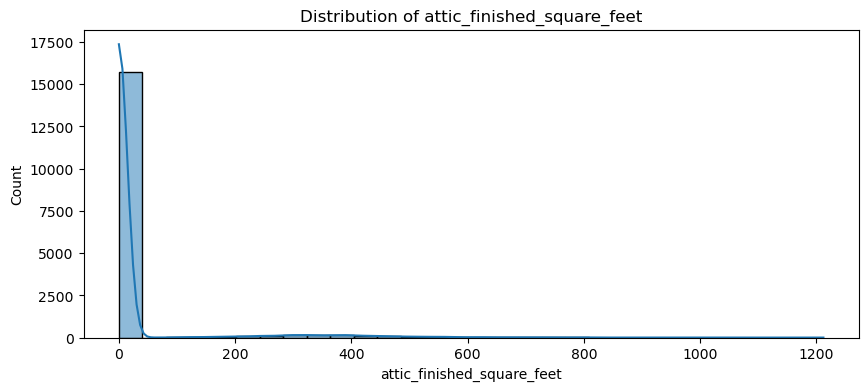

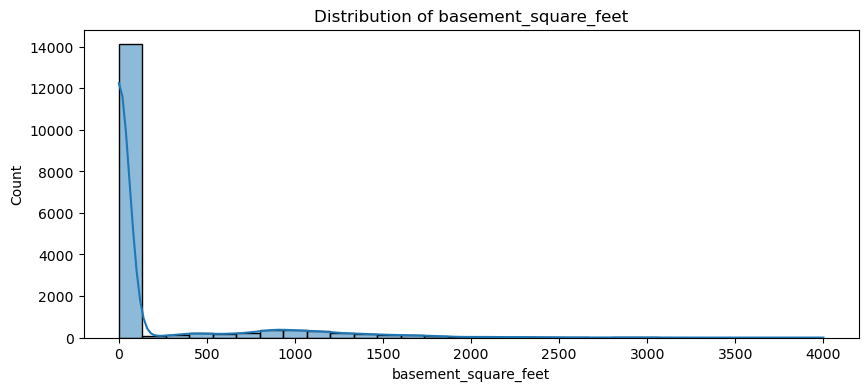

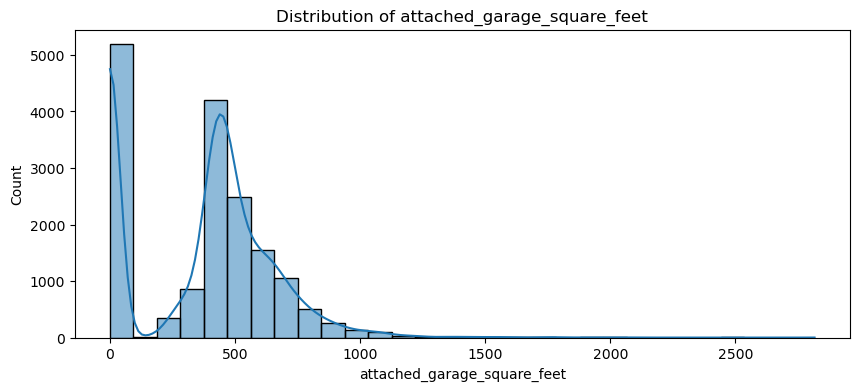

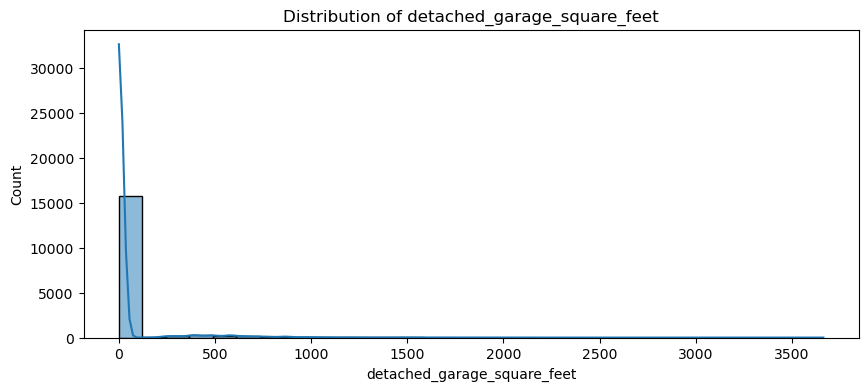

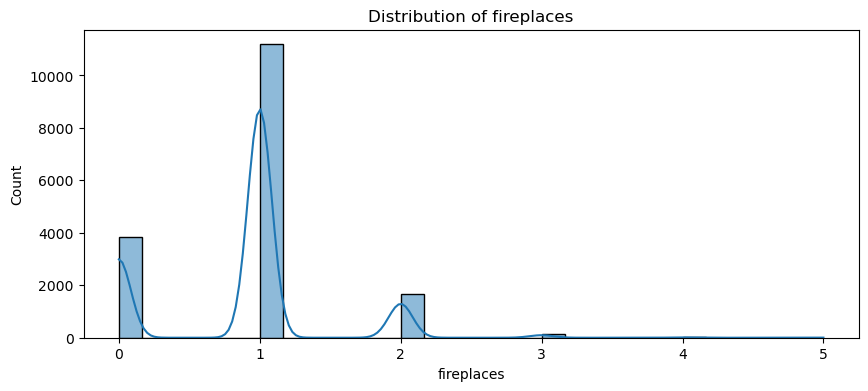

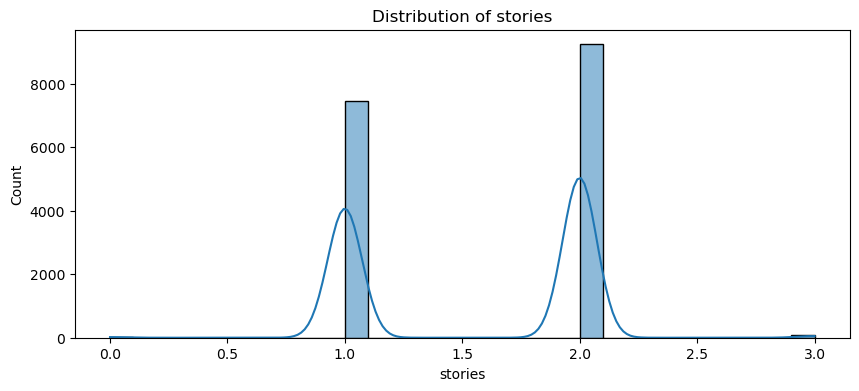

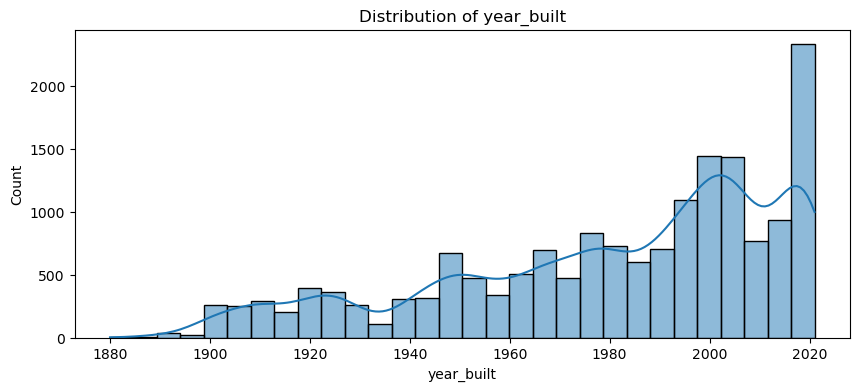

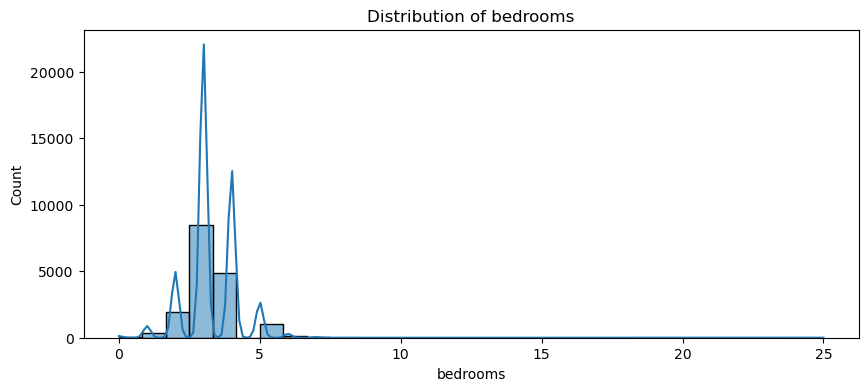

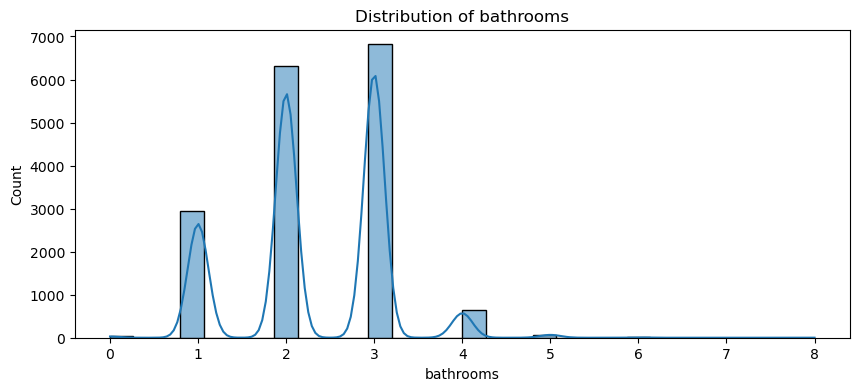

In [5]:
# 1: visualization

# checking for missing values
print(df.isnull().sum())

# visualize distributions of numerical features
numeric_features = df.select_dtypes(include=[np.number])
for column in numeric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [7]:
# 2: Transform Variables

# categorical variables
df = pd.get_dummies(df, drop_first=True)

# log transformation of skewed features if needed
for column in numeric_features.columns:
    if df[column].skew() > 1:
        df[column] = np.log1p(df[column])

In [10]:
# 3: Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('sale_price', axis=1)
y = df['sale_price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# 4: Simple Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model_train = LinearRegression()
model_test = LinearRegression()

model_train.fit(X_train, y_train)
model_test.fit(X_test, y_test)

y_pred_train = model_train.predict(X_train)
y_pred_test = model_test.predict(X_test)

# evaluations for training model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

# evaluations for testing model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("Training Model Performance:")
print("Train RMSE:", train_rmse)
print("Train R^2:", train_r2)

print("\nTesting Model Performance:")
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Training Model Performance:
Train RMSE: 0.30265718873280034
Train R^2: 0.4959768832311604

Testing Model Performance:
Test RMSE: 0.27347690542633046
Test R^2: 0.5882935410816706


The testing model performs better.

In [17]:
# 5: Complex Model
from sklearn.preprocessing import PolynomialFeatures

# polynomial features
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

complex_model = LinearRegression()
complex_model.fit(X_poly_train, y_train)

# predictions
y_complex_pred_train = complex_model.predict(X_poly_train)
y_complex_pred_test = complex_model.predict(X_poly_test)

# evaluation
complex_train_rmse = np.sqrt(mean_squared_error(y_train, y_complex_pred_train))
complex_test_rmse = np.sqrt(mean_squared_error(y_test, y_complex_pred_test))
complex_train_r2 = r2_score(y_train, y_complex_pred_train)
complex_test_r2 = r2_score(y_test, y_complex_pred_test)

print("Complex Model Train RMSE:", complex_train_rmse)
print("Complex Model Test RMSE:", complex_test_rmse)
print("Complex Model Train R^2:", complex_train_r2)
print("Complex Model Test R^2:", complex_test_r2)


Complex Model Train RMSE: 0.19808150689347803
Complex Model Test RMSE: 10722.493686937602
Complex Model Train R^2: 0.7841081089070263
Complex Model Test R^2: -632904180.3693987


The complex model significantly underperforms on the test set, with a high test RMSE and a negative R^2, indicating poor predictive accuracy compared to the simpler models.

In [13]:
# 6: Result Summary
print("Simple Model Performance:")
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}, Train R^2: {train_r2}, Test R^2: {test_r2}")

print("\nComplex Model Performance:")
print(f"Train RMSE: {complex_train_rmse}, Test RMSE: {complex_test_rmse}, Train R^2: {complex_train_r2}, Test R^2: {complex_test_r2}")

Simple Model Performance:
Train RMSE: 0.30265718873280034, Test RMSE: 0.30845599778240357, Train R^2: 0.4959768832311604, Test R^2: 0.47623942449336987

Complex Model Performance:
Train RMSE: 0.19808150689347803, Test RMSE: 10722.493686937602, Train R^2: 0.7841081089070263, Test R^2: -632904180.3693987


While the simple linear models provided a balanced performance with reasonable RMSE and R^2 values, the complex model showed severe overfitting with its high test RMSE and negative R^2.

In [16]:
# 7: Lasso Model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# predictions
y_lasso_pred_train = lasso_model.predict(X_train)
y_lasso_pred_test = lasso_model.predict(X_test)

# evaluation
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_lasso_pred_train))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred_test))
lasso_train_r2 = r2_score(y_train, y_lasso_pred_train)
lasso_test_r2 = r2_score(y_test, y_lasso_pred_test)

print("Lasso Model Train RMSE:", lasso_train_rmse)
print("Lasso Model Test RMSE:", lasso_test_rmse)
print("Lasso Model Train R^2:", lasso_train_r2)
print("Lasso Model Test R^2:", lasso_test_r2)

selected_features = X_train.columns[(lasso_model.coef_ != 0)]
print("Selected Features by Lasso:", selected_features)

Lasso Model Train RMSE: 0.3346999810199796
Lasso Model Test RMSE: 0.32955147498301296
Lasso Model Train R^2: 0.38360395491385035
Lasso Model Test R^2: 0.40214910185682273
Selected Features by Lasso: Index(['house_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'year_built'],
      dtype='object')
